<h1><b> 1. Objective Setting</b></h1>

<h3>Purpose:<br>다이아몬드 가격을 예측하여 다이아몬드 가격 책정을 돕고자 한다
<br>To do:<br>다이아몬드의 색상, Quality 등을 통해 다이아몬드 가격을 예측</h3>



In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

df = pd.read_csv('diamonds.csv')
print(df.shape)

(53940, 11)


In [14]:
# 데이터를 상위 5개만 출력한다.
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h1> 2. Data Inspection </h1>

<h2> 1) Feature 유형 및 의미 파악</h2>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed:0    53940 non-null int64
carat        53940 non-null float64
cut          53940 non-null object
color        53940 non-null object
clarity      53940 non-null object
depth        53940 non-null float64
table        53940 non-null float64
price        53940 non-null int64
x            53940 non-null float64
y            53940 non-null float64
z            53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<h2> 2) Feature 기초 통계량 및 분포 확인</h2> 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f589e734278>,
      dtype=object)

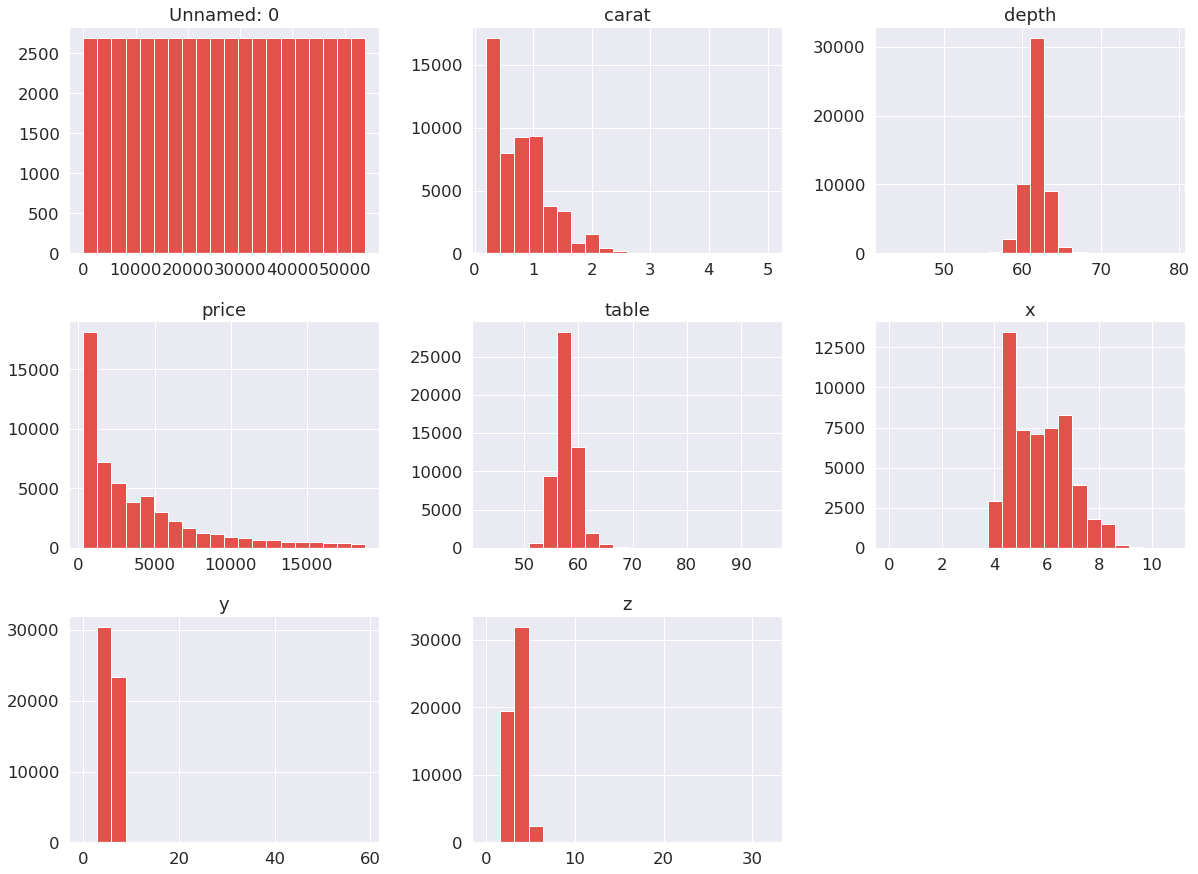

In [237]:
#데이터의 분포를 파악한다.
df.hist(bins=20, figsize=(20,15))

In [11]:
df.describe()

,Unnamed:0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h2> 3) 시각화를 통한 Outlier 파악 </h2>

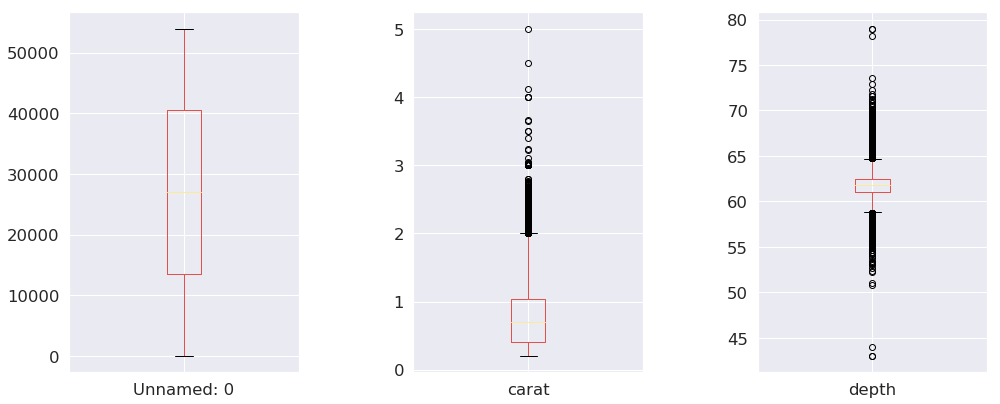

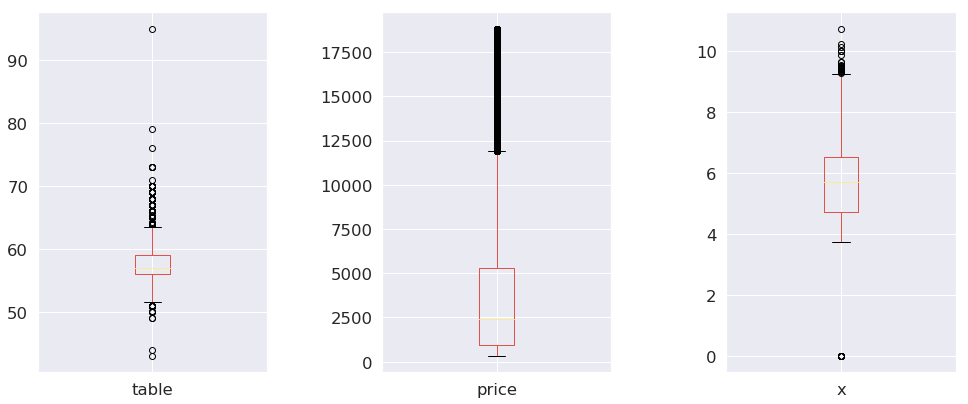

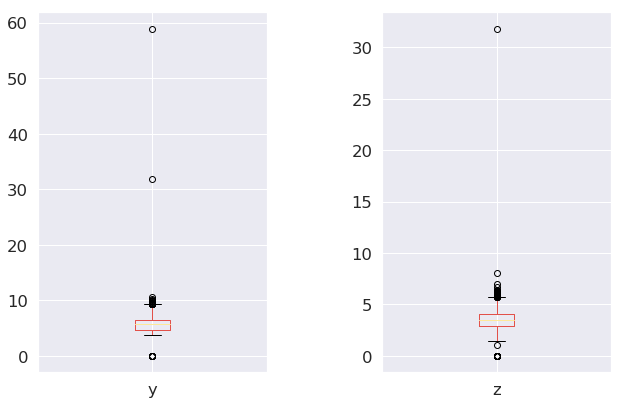

In [239]:
def drawBoxPlot(data):
    columns = data._get_numeric_data().columns
    size = len(columns)
    count = 0
    
    while size>0:
        if size>=3:
            range_num = 3
        else:
            range_num = size
            
        fig = plt.figure(figsize=(15,5))
        for i in np.arange(range_num)+1:
            axe = fig.add_subplot(1,3,i)
            data.boxplot(column= columns[count])
            count = count+1
        plt.subplots_adjust(top=1, bottom=0, left=0.10, right=0.95, hspace=0.5,
                        wspace=0.5)
        plt.show()
        size = size - 3
       
            
drawBoxPlot(df)


각 column마다 boxplot을 그려서 Outlier 유무를 확인한다.
>> 이 데이터에서는 table, x, y z 등에서 이상치가 발견 되었다.

<h2> 4) Massing value 파악 </h2>

값이 0인것도 missing value에 속하므로 0을 전부 np.NAN으로 변경한 후 null값을 count한다.

In [13]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)

tab_info = pd.DataFrame(df.dtypes).rename(columns={0:'types'})
tab_info['null count']= df.isnull().sum()
tab_info['null %'] = df.isnull().sum()/df.shape[0]
tab_info

,types,null count,null %
Unnamed: 0,int64,0,0.000000
carat,float64,0,0.000000
cut,object,0,0.000000
color,object,0,0.000000
clarity,object,0,0.000000
depth,float64,0,0.000000
table,float64,0,0.000000
price,int64,0,0.000000
x,float64,8,0.000148
y,float64,7,0.000130


>> x, y, z에서 missing value가 일부 발견

<h2> 5) 카테고리 데이터 파악 </h2>

<h3> 5-1) Cut 분포 </h3>

In [241]:
#unique value
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

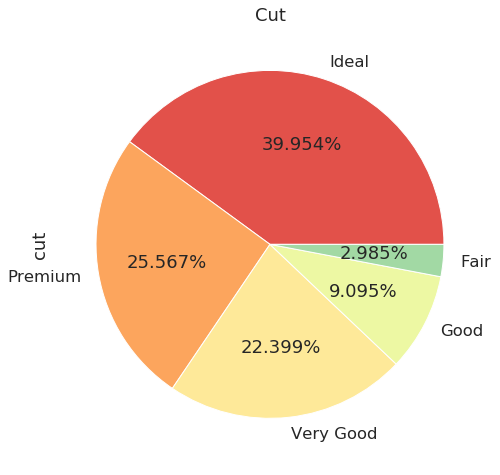

In [242]:
#pie chart
df['cut'].value_counts().plot.pie(autopct='%.3f%%', figsize=(8,8))
plt.title("Cut")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


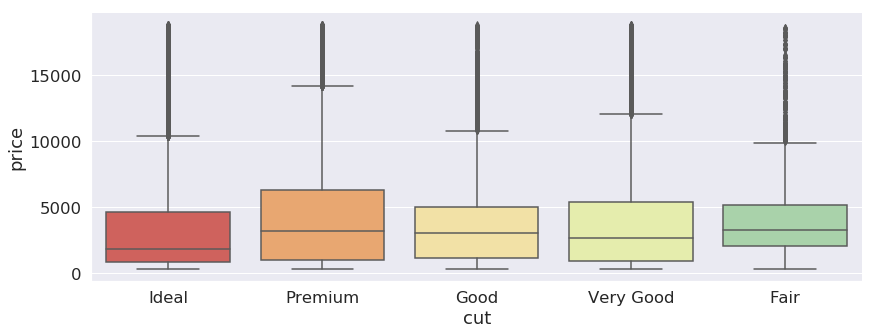

In [243]:
#Cut 변수 별 Price에 미치는 영향 파악
p = sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

>>Premium일 때가 상대적으로 price가 높다.

<h3>  5-2) Color </h3>

In [244]:
#unique value
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

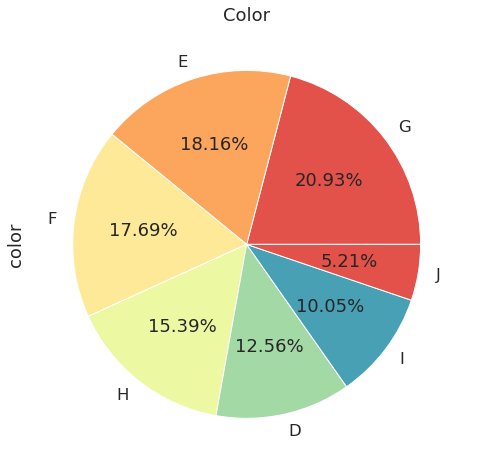

In [245]:
#pie chart
df['color'].value_counts().plot.pie(autopct='%.2f%%', figsize=(8,8))
plt.title("Color")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


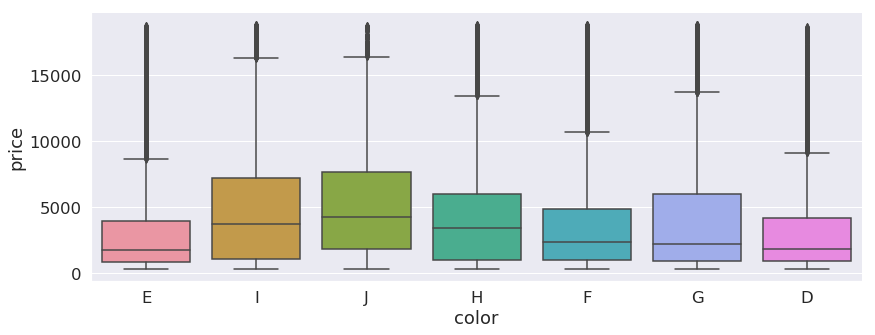

In [246]:
#Color 변수 별 Price에 미치는 영향 파악
p = sns.factorplot(x='color', y='price', data=df, kind='box' ,aspect=2.5 )

>> J일때가 price가 상대적으로 높다.

<h3> 5-3) Clarity </h3>

In [247]:
#unique value
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

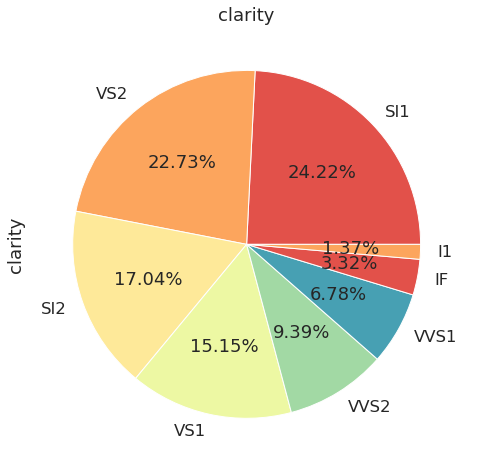

In [248]:
#pie chart
df['clarity'].value_counts().plot.pie(autopct='%.2f%%', figsize=(8,8))
plt.title("clarity")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


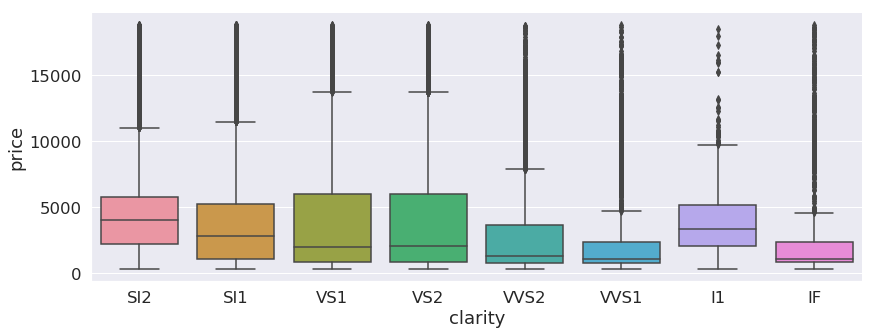

In [249]:
#Clarity 변수 별 Price에 미치는 영향 파악
p = sns.factorplot(x='clarity', y='price', data=df, kind='box' ,aspect=2.5 )

>> VS1, VS2일 때가 price가 상대적으로 높다.

<h2> 6) Feature 상관관계 </h2>

In [250]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.406249,-0.396414,-0.401758
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.977765,0.953989,0.961048
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025097,-0.029142,0.095023
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.196130,0.184519,0.152483
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.887227,0.867870,0.868206
x,-0.406249,0.977765,-0.025097,0.196130,0.887227,1.000000,0.974933,0.975435
y,-0.396414,0.953989,-0.029142,0.184519,0.867870,0.974933,1.000000,0.956744
z,-0.401758,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


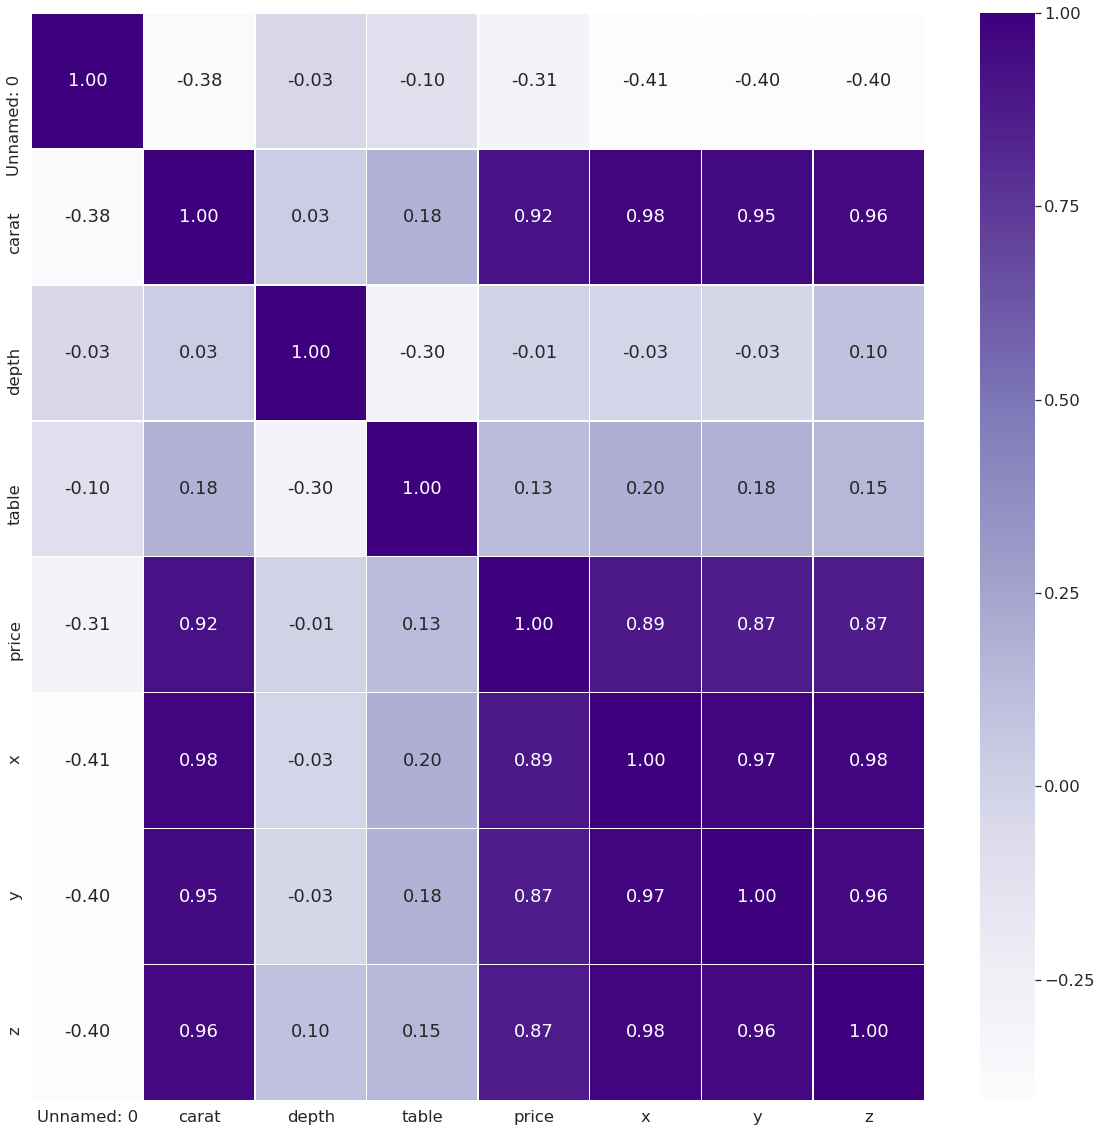

In [251]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Purples')

* x, y, z는 가격과 매우 강한 관계를 가짐
* Depth는 가격과 중요한 관계를 갖지 않음
* Carat은 가격과 강한 관계를 가짐
* Table은 가격과 강한 관계를 갖지 X

<h1> 3. Preprocessing </h1>

<h2> 1) Data Reduction </h2>
<h3>1-1) Feature삭제</h3>
   price에 영향을 미치지 않는 Unnamed:0 column삭제

In [14]:
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<h3> 1-2) Missing value 삭제</h3>

In [15]:
print(df.shape)
df=df.dropna(how='any')
print(df.shape)

(53940, 10)
(53920, 10)


<h2> 2) Outlier 제거 </h2>

<h3> 방법 1: Z-score </h3>

In [16]:
from scipy import stats

z = np.abs(stats.zscore(df._get_numeric_data()))
threshold=3

df = df[(z<threshold).all(axis=1)]
df.shape

(51586, 10)

> Threshold의 값을 바꿔가며 Testing해본다 

<h2> 3)  Derived Feature </h2>

아까 상관관계를 봤을 때 x,y,z끼리의 상관관계가 높은 것을 확인할 수 있다
따라서 x, y, z를 volume이라는 하나의 변수로 표현한다

volume = x*y*z

In [17]:
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x','y','z'], axis=1, inplace= True)
df.head(5)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336,38.693952


<h2> 4) Categorical Data </h2>

In [18]:
categorical_columns = ['cut','color','clarity']
df = pd.get_dummies(df, columns=categorical_columns)
df.columns

Index(['carat', 'depth', 'table', 'price', 'volume', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

추가된 변수들의 상관관계를 다시 확인해본다

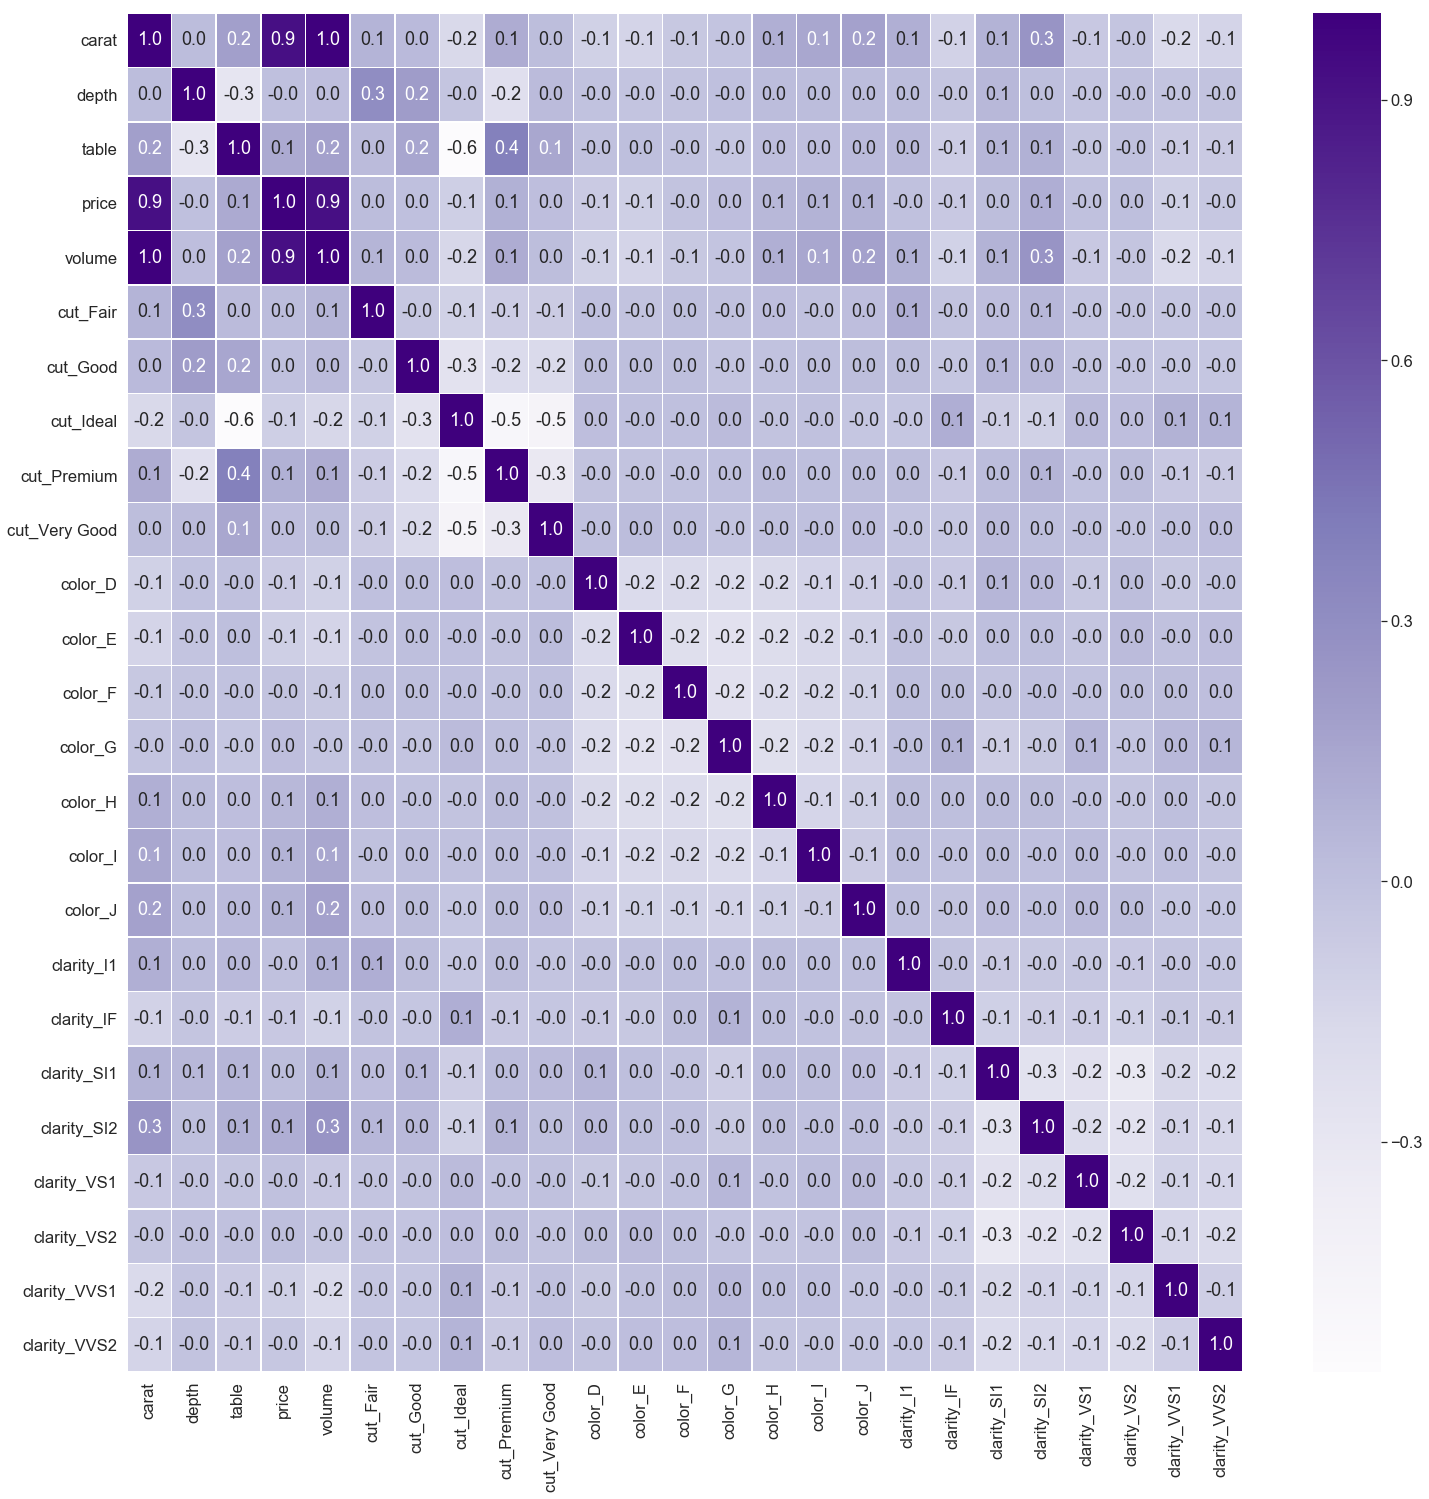

In [21]:
plt.figure(figsize=(25,25))
sns.heatmap(data=df.corr(), annot=True, fmt='.1f', linewidths=.5, cmap='Purples')

<h2> 5) Feature Engineering </h2>

In [19]:
target = 'price'
X = df.loc[:,df.columns!=target]
y = df[[target]]

In [20]:
print(df.dtypes)
numerical_feature = [col for col in X.columns if X[col].dtypes == 'float64' or X[col].dtypes =='int64']
print(numerical_feature)



carat            float64
depth            float64
table            float64
price              int64
volume           float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object
['carat', 'depth', 'table', 'volume']


In [73]:
#Testset 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

#카테고리 데이터는 scaling 할 때 제외시킨다.
num_feature = [col for col in X.columns if X[col].dtypes == 'float64' or X[col].dtypes =='int64']

print("Train:",X_train.shape)
print("Test:",X_test.shape)

Train: (41268, 24)
Test: (10318, 24)


<h3>방법1 : MinMaxScaler</h3>

In [25]:
minmaxScaler = preprocessing.MinMaxScaler()
minmaxScaler.fit(X_train[num_feature])

X_train[num_feature] = pd.DataFrame (minmaxScaler.transform(X_train[num_feature]), index= X_train.index, columns =num_feature)
X_test[num_feature] = pd.DataFrame (minmaxScaler.transform(X_test[num_feature]), index= X_test.index, columns = num_feature)

C:\Users\82105\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\82105\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


> Feature이 range가 전부 달랐는데 minmax scaler를 통해 0~1사이의 값으로 변형하였다.

In [52]:
X_train.head(5)

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16320,1.09,61.3,55.9,178.463390,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26255,1.50,62.2,60.0,240.411630,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48653,0.36,63.3,56.0,58.301100,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7906,1.07,59.2,57.0,175.727600,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2005,0.72,60.5,57.0,122.320575,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


<h3>방법2: Standard Scaler</h3>

In [22]:
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(X_train[num_feature])
X_train[num_feature] = pd.DataFrame (standardScaler.transform(X_train[num_feature]), index= X_train.index, columns =num_feature)
X_test[num_feature] = pd.DataFrame (standardScaler.transform(X_test[num_feature]), index= X_test.index, columns = num_feature)

C:\Users\82105\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\82105\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
X_train.head(5)

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16320,0.774362,-0.358671,-0.702125,0.794905,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26255,1.740670,0.349756,1.250657,1.699100,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48653,-0.946137,1.215610,-0.654496,-0.958981,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7906,0.727225,-2.011666,-0.178208,0.754973,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2005,-0.097671,-0.988383,-0.178208,-0.024555,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


<h3> 방법3: RobustScaler </h3>

In [39]:
robustScaler = preprocessing.RobustScaler()
robustScaler.fit(X_train[num_feature])
X_train[num_feature] = pd.DataFrame (robustScaler.transform(X_train[num_feature]), index= X_train.index, columns =num_feature)
X_test[num_feature] = pd.DataFrame (robustScaler.transform(X_test[num_feature]), index= X_test.index, columns = num_feature)

C:\Users\82105\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\82105\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [40]:
X_train.head(5)

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16320,0.619048,-0.357143,-0.366667,0.628415,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26255,1.269841,0.285714,1.000000,1.227519,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48653,-0.539683,1.071429,-0.333333,-0.533677,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7906,0.587302,-1.857143,0.000000,0.601958,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2005,0.031746,-0.928571,0.000000,0.085457,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


<h3> 방법4: Normalizer </h3>

In [26]:
nomalizer = preprocessing.Normalizer()

nomalizer.fit(X_train[num_feature])
X_train[num_feature] = pd.DataFrame (nomalizer.transform(X_train[num_feature]), index= X_train.index, columns =num_feature)
X_test[num_feature] = pd.DataFrame (nomalizer.transform(X_test[num_feature]), index= X_test.index, columns = num_feature)

C:\Users\82105\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\82105\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [27]:
X_train.head(5)

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16320,0.005538,0.311473,0.284035,0.906795,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26255,0.005871,0.243466,0.234854,0.941028,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48653,0.003506,0.616512,0.545413,0.567825,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7906,0.005516,0.305159,0.293818,0.905825,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2005,0.004868,0.409082,0.385416,0.827093,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


<h1> 4. Data Analysis & Evaluation </h1>

<h2> 1) Linear Regression </h2>

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Linear Regression #######
Score : 0.9208
[0.91679917 0.92220745 0.92149029 0.91928629 0.91950041]

MSE    : 945310.14 
MAE    : 694.87 
RMSE   : 972.27 
R2     : 0.92 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


<h2> [Option] PCA </h2>

In [70]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=10)
X_train = estimator.fit_transform(X_train)
X_test = estimator.fit_transform(X_test)

print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (41268, 10)
X_test (10318, 10)


<h2> [Option] Feature Selection </h2>

In [76]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=20)
selector.fit(X_train,y_train)
X_train = selector.transform(X_train)
#X_train = X_train.columns[selector.get_support(indices=True)]

X_test= selector.transform(X_test)
#X_test = X_test.columns[selector.get_support(indices=True)]

print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (41268, 20)
X_test (10318, 20)


다른 알고리즘: https://www.kaggle.com/fuzzywizard/diamonds-in-depth-analysis